In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

gets the file names in a list and reads the excel files and saves them in a list of dataframes called "samples" / it also gives as a list of the number of their rows called "rows"

In [2]:
def read_sampels(file_names):
    samples = list()
    rows = list()

    for i in range (len (file_names)):
        samples.append(pd.read_excel(file_names[i], usecols= "C,D,F,I,K,L,M,O"))
        rows.append(len(samples[i]))
    
    return [samples, rows]

In [3]:
def LevelCheck (level, T, F):
    if level == 2:
        if (T+F) == 2:
            return 1
        else:
            return False
    elif level == 4:
        if (T+F) == 3:
            return 2
        else:
            return False
    elif level == 7:
        if (T+F) == 4:
            return 3
        else:
            return False
    elif level == 8:
        if (T+F) == 4:
            return 4
        else:
            return False
    elif level == 11:
        if (T+F) == 5:
            return 5
        else:
            return False

In [4]:
def levels_accuracy(sample, rows):
    LevelsAccSum = np.zeros(5)  #the sum of accuracy for each level
    LevelNum = np.zeros(5)      #for counting each level's num

    for i in range(rows):
        level = int(sample.iloc[i ,1])
        T = int(sample.iloc[i, 4])
        F = int(sample.iloc[i, 5])
        
        LIndex = LevelCheck(level, T, F)        #if the level is completed, it gets the index of the level [2,4,7,8,11]
        if LIndex:
            Acc = T / (T+F)
            LevelNum[(LIndex-1)] += 1  
            LevelsAccSum[(LIndex-1)] += Acc
        
    LevelsAcc = [LevelsAccSum[i]/LevelNum[i] for i in range(5) ]
    return LevelsAcc
    #print(LevelsAcc)

In [5]:
def Ages_Accuracy(samples, rows):
    AgeAcc = list()
    for i in range(len(rows)):
        AgeAcc.append(levels_accuracy(samples[i], rows[i]))
    
    return AgeAcc


In [6]:
def plot_for_levels (Levels, LevelsData, file_names):
    labels = [word[7:13] for word in file_names]
    
    for i in range(len(labels)):
        plt.plot(Levels, LevelsData[i], label = labels[i])

    plt.legend()
    plt.xticks([2, 4, 7, 8, 11])
    plt.xlabel("level")
    plt.ylabel("accuracy")
    plt.show()

In [9]:
file_names = ['Clouds-Nikan1.xlsx',
              'Clouds-Nikan2.xlsx',
              'Clouds-Nikan3.xlsx',
              'Clouds-Nikan4.xlsx',
              'Clouds-Nikan5.xlsx',
              'Clouds-Nikan6.xlsx',
              'Clouds-Nikan7.xlsx']

[samples, rows] = read_sampels(file_names)
#print(rows)

[1000, 533, 567, 989, 702, 453, 179]


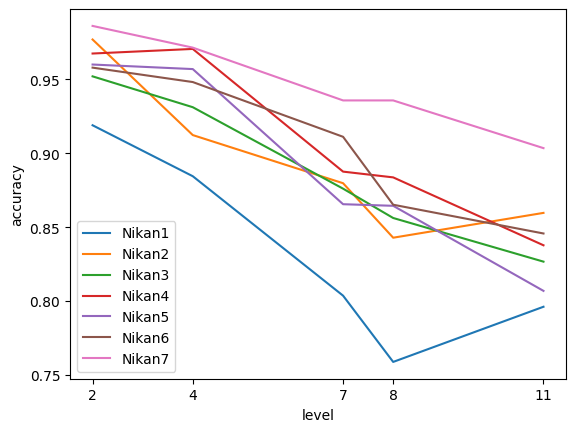

In [8]:
AgesAcc = Ages_Accuracy(samples, rows)

levels = [2, 4, 7, 8, 11]

plot_for_levels(levels, AgesAcc, file_names)